# Final Project

## USA Housing Listings
###### Author = "Udaya Lakshmi Punnam", "Keerthi Pulipaka", "Deepthi Poosala", "Chandra Sidhartha Kodela"

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Load the Dataset
df = pd.read_csv(r"C:\Users\udaya\Downloads\USA Housing Listings.csv")
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

laundry_options     79026
parking_options    140687
description             2
lat                  1918
long                 1918
dtype: int64

In [4]:
# Handle missing values
df['laundry_options'].fillna('Unknown', inplace=True)
df['parking_options'].fillna('Unknown', inplace=True)
df['description'].fillna('No description available', inplace=True)
df['lat'].fillna(df['lat'].mean(), inplace=True)
df['long'].fillna(df['long'].mean(), inplace=True)

# Check for missing values again
missing_values_after = df.isnull().sum()

# Display columns with missing values
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


In [5]:
# Select the first 2000 observations
df1 = df.iloc[0:2000]
df1

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,Unknown,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7049579458,https://sacramento.craigslist.org/apa/d/live-o...,sacramento,https://sacramento.craigslist.org,2500,house,1800,4,2.0,0,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00M0M_gs9juOWzp0...,"Happy New Year! I have a 4 bedroom, 2 bath, si...",39.2601,-121.692,ca
1996,7039874549,https://sacramento.craigslist.org/apa/d/vallej...,sacramento,https://sacramento.craigslist.org,1819,apartment,804,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00a0a_6FHDRVNC6s...,Seize your chance to live in one of the premie...,38.1053,-122.247,ca
1997,7040405559,https://sacramento.craigslist.org/apa/d/rancho...,sacramento,https://sacramento.craigslist.org,1567,apartment,1034,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00C0C_5UGr4fpL9p...,"At the Chesapeake Commons, it is a top priorit...",38.5786,-121.295,ca
1998,7042218213,https://sacramento.craigslist.org/apa/d/sacram...,sacramento,https://sacramento.craigslist.org,1102,apartment,597,1,1.0,0,...,0,0,0,Unknown,Unknown,https://images.craigslist.org/00d0d_kEHT9SEcTY...,Living the luxurious life in the comfortable h...,38.4743,-121.441,ca


In [6]:
# Inspect the dataset
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2000 non-null   int64  
 1   url                      2000 non-null   object 
 2   region                   2000 non-null   object 
 3   region_url               2000 non-null   object 
 4   price                    2000 non-null   int64  
 5   type                     2000 non-null   object 
 6   sqfeet                   2000 non-null   int64  
 7   beds                     2000 non-null   int64  
 8   baths                    2000 non-null   float64
 9   cats_allowed             2000 non-null   int64  
 10  dogs_allowed             2000 non-null   int64  
 11  smoking_allowed          2000 non-null   int64  
 12  wheelchair_access        2000 non-null   int64  
 13  electric_vehicle_charge  2000 non-null   int64  
 14  comes_furnished         

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.000000e+03,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.046671e+09,1500.52500,978.041500,1.811500,1.517750,0.753500,0.74150,0.646000,0.078000,0.020500,0.049000,39.116320,-120.294981
std,3.961506e+06,2159.68048,560.987389,0.869682,0.587565,0.431081,0.43792,0.478329,0.268239,0.141738,0.215922,0.719089,1.514979
min,7.029250e+09,200.00000,70.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,32.586400,-122.536000
25%,7.046039e+09,1199.00000,720.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,38.663900,-121.295000
50%,7.047486e+09,1430.00000,900.000000,2.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,39.478600,-119.843500
75%,7.049669e+09,1700.00000,1121.000000,2.000000,2.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,39.535900,-119.760000
max,7.050084e+09,95834.00000,17951.000000,7.000000,5.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,41.759900,-92.700631


In [7]:
# Check for missing values again
missing_values_after = df1.isnull().sum()

# Display columns with missing values
print("Columns with missing values in the first 2000 observations:")
print(missing_values_after[missing_values_after > 0])

Columns with missing values in the first 2000 observations:
Series([], dtype: int64)


In [8]:
# Define feature columns and target column
feature_columns = ['sqfeet', 'baths', 'laundry_options', 'parking_options']
target_column = 'price'

print("Feature Columns:", feature_columns)
print("Target Column:", target_column)

Feature Columns: ['sqfeet', 'baths', 'laundry_options', 'parking_options']
Target Column: price


In [9]:
# Separate features and target
X = df1[feature_columns]
y = df1[target_column]

In [10]:
# Preprocessing for numerical data
numerical_features = ['sqfeet', 'baths']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [11]:
# Preprocessing for categorical data
categorical_features = ['laundry_options', 'parking_options']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['sqfeet', 'baths']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['laundry_options', 'parking_options'])])

In [13]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model

RandomForestRegressor(random_state=42)

In [14]:
# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sqfeet', 'baths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['laundry_options',
                                                   'parking_options'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sqfeet', 'baths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['laundry_options',
                                                   'parking_options'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [17]:
# Predict and evaluate the model
y_pred = pipeline.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 152.10667158781132
Mean Squared Error: 85215.31010702191
R-squared: 0.6066134602133224


Model Performance:
- The MAE of 152.11 suggests that, on average, your model's predictions are relatively close to the actual prices, considering the context of housing prices.
- The MSE of 85215.31 indicates that the errors can be substantial in magnitude, highlighting areas where your model could potentially be improved.
- The R-squared value of 0.6066 indicates that your model explains a moderate amount of variance in housing prices. There's room for improvement, but achieving a high R-squared in real estate predictions can be challenging due to the inherent variability in property prices.

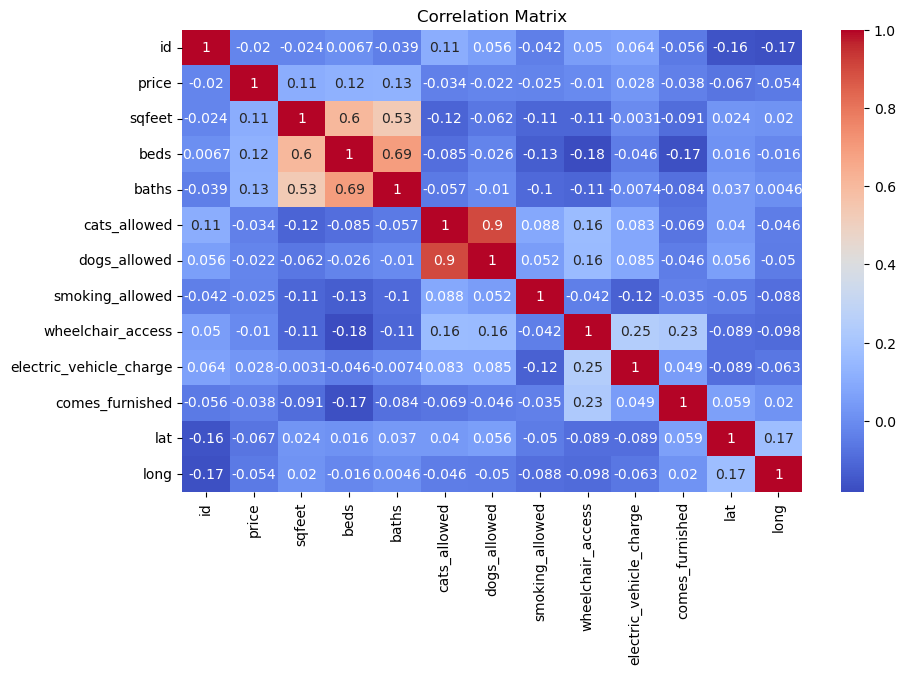

In [18]:
# Compute the correlation matrix
corr_matrix = df1.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Select numerical features
numerical_features = ['sqfeet', 'baths']

# Calculate VIF for each feature
X = df1[numerical_features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

  Feature       VIF
0  sqfeet  5.509014
1   baths  5.509014


###### The heatmap shows the correlation coefficients and a VIF table for the numerical features. If any features have a high VIF value, consider removing them or using techniques like Principal Component Analysis (PCA) to reduce multi-collinearity.

Interpretation of VIF Values:
sqfeet:

VIF = 5.51
This indicates that sqfeet is moderately correlated with baths. A VIF around 5.51 suggests some level of correlation but not severe multi-collinearity.
baths:

VIF = 5.51
Similarly, baths also has a VIF of approximately 5.51, indicating moderate correlation with sqfeet.

With VIF values around 5.51 for both sqfeet and baths, you have moderate correlation between these features. This level of multi-collinearity is manageable but requires careful interpretation of model results. By continuing with appropriate preprocessing and modeling techniques, you can develop a reliable predictive model for housing price estimation.

###### Univariate Analysis - Histograms and Distributions

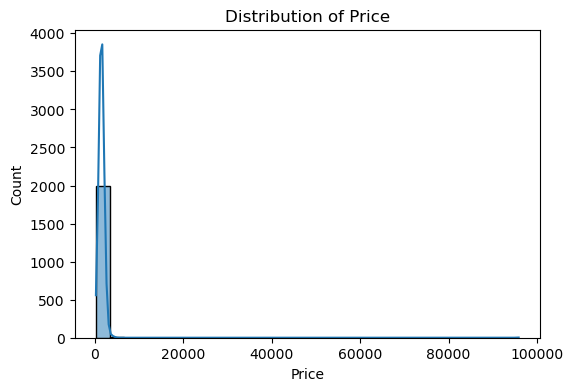

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df1['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

###### Univariate Analysis - Countplots for Categorical Variables

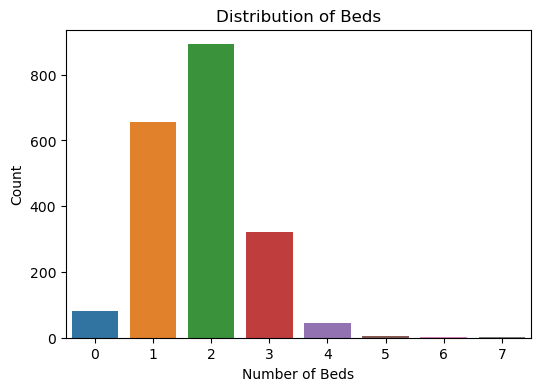

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='beds', data=df1)
plt.title('Distribution of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Count')
plt.show()

###### Bivariate Analysis - Scatter Plots

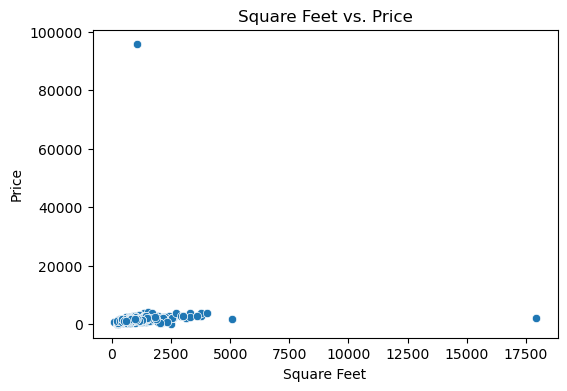

In [22]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sqfeet', y='price', data=df1)
plt.title('Square Feet vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

###### Bivariate Analysis - Box Plots

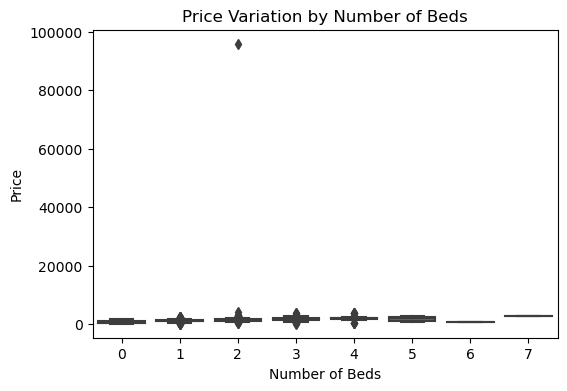

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='beds', y='price', data=df1)
plt.title('Price Variation by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.show()

###### Correlation Analysis - Pairplot

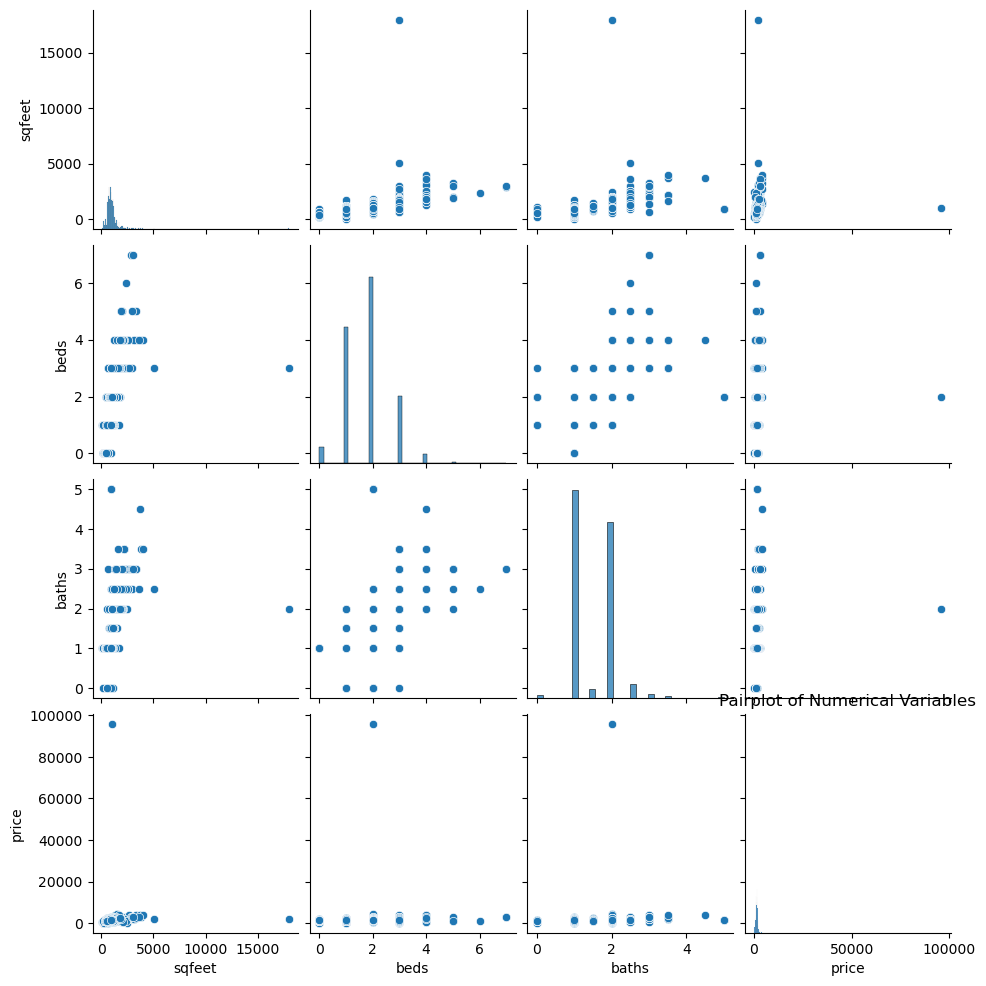

In [24]:
sns.pairplot(df1[['sqfeet', 'beds', 'baths', 'price']])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [25]:
# Interaction between square feet and number of beds
df1['sqfeet_beds'] = df1.apply(lambda row: row['sqfeet'] * row['beds'], axis=1)

# Interaction between square feet and number of baths
df1['sqfeet_baths'] = df1.apply(lambda row: row['sqfeet'] * row['baths'], axis=1)

# Display the updated DataFrame with interactions
print(df1[['sqfeet', 'beds', 'baths', 'sqfeet_beds', 'sqfeet_baths']].head())

   sqfeet  beds  baths  sqfeet_beds  sqfeet_baths
0    1078     3    2.0         3234        2156.0
1    1001     2    2.0         2002        2002.0
2    1683     2    2.0         3366        3366.0
3     708     1    1.0          708         708.0
4     250     0    1.0            0         250.0


C:\Users\udaya\AppData\Local\Temp\ipykernel_21608\3510942155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sqfeet_beds'] = df1.apply(lambda row: row['sqfeet'] * row['beds'], axis=1)
C:\Users\udaya\AppData\Local\Temp\ipykernel_21608\3510942155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sqfeet_baths'] = df1.apply(lambda row: row['sqfeet'] * row['baths'], axis=1)


In [26]:
# Apply log transformation to square feet
df1['log_sqfeet'] = np.log1p(df1['sqfeet'])

# Apply log transformation to price
df1['log_price'] = np.log1p(df1['price'])

# Display the updated DataFrame with log-transformed features
print(df1[['sqfeet', 'log_sqfeet', 'price', 'log_price']].head())

   sqfeet  log_sqfeet  price  log_price
0    1078    6.983790   1148   7.046647
1    1001    6.909753   1200   7.090910
2    1683    7.428927   1813   7.503290
3     708    6.563856   1095   6.999422
4     250    5.525453    289   5.669881


C:\Users\udaya\AppData\Local\Temp\ipykernel_21608\1651984337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['log_sqfeet'] = np.log1p(df1['sqfeet'])
C:\Users\udaya\AppData\Local\Temp\ipykernel_21608\1651984337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['log_price'] = np.log1p(df1['price'])


In [27]:
# One-hot encoding for categorical variables
df1 = pd.get_dummies(df1, columns=['laundry_options', 'parking_options'], drop_first=True)

In [28]:
# Convert date_posted to datetime (if applicable)
if 'date_posted' in df1.columns:
    df1['date_posted'] = pd.to_datetime(df1['date_posted'])

    # Extract year, month, and day
    df1['year_posted'] = df1['date_posted'].dt.year
    df1['month_posted'] = df1['date_posted'].dt.month
    df1['day_posted'] = df1['date_posted'].dt.day

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature columns and target column
feature_columns = [col for col in df1.columns if col != 'price' and col != 'date_posted']
target_column = 'price'

# Separate features and target
X = df1[feature_columns]
y = df1[target_column]

# Preprocessing for numerical data
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 12.295224999999995
Mean Squared Error: 35929.287899250005
R-squared: 0.8341366331245608


In [30]:
# Define the model
linear_model = LinearRegression()

# Create the pipeline
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', linear_model)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
linear_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = linear_pipeline.predict(X_test)
print('Linear Regression:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Linear Regression:
Mean Absolute Error: 515.4545456744777
Mean Squared Error: 1008516.3619839374
R-squared: -3.655698154015374


In [31]:
# Define the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', random_forest_model)])

# Train the model
random_forest_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = random_forest_pipeline.predict(X_test)
print('Random Forest:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Random Forest:
Mean Absolute Error: 12.295224999999995
Mean Squared Error: 35929.287899250005
R-squared: 0.8341366331245608


In [32]:
# Define the model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create the pipeline
gradient_boosting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('model', gradient_boosting_model)])

# Train the model
gradient_boosting_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = gradient_boosting_pipeline.predict(X_test)
print('Gradient Boosting:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Gradient Boosting:
Mean Absolute Error: 6.350041552091295
Mean Squared Error: 261.1478442671741
R-squared: 0.9987944414366386


Model Evaluation Metrics:

Linear Regression:
Mean Absolute Error: 515.4545
Mean Squared Error: 1008516.3619
R-squared: -3.6557

Random Forest:
Mean Absolute Error: 12.2952
Mean Squared Error: 35929.2879
R-squared: 0.8341

Gradient Boosting:
Mean Absolute Error: 6.3500
Mean Squared Error: 261.1478
R-squared: 0.9988

Selection Criteria:

Mean Absolute Error (MAE): Indicates the average magnitude of the errors in a set of predictions, without considering their direction. Lower values are better.
Mean Squared Error (MSE): Represents the average of the squares of the errors, with lower values indicating better fit.
R-squared: Indicates how well the independent variables explain the variability of the dependent variable. Values closer to 1 are better.

Analysis:

The Linear Regression model performed poorly, as indicated by the high MAE and MSE and the negative R-squared value, which suggests that the model is worse than simply using the mean value of the target variable.
The Random Forest model performed significantly better with lower MAE and MSE, and a much higher R-squared value, indicating a good fit.
The Gradient Boosting model performed the best with the lowest MAE and MSE, and an R-squared value very close to 1, indicating an excellent fit.

Conclusion:

The Gradient Boosting model is the best model for your property price prediction task based on its superior performance across all evaluation metrics.

In [33]:
# Finalize the Gradient Boosting model
final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the entire dataset
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', final_model)])
final_pipeline.fit(X, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on test set
y_pred = final_pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the metrics
print('Model Evaluation Metrics:')
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2 Score):', r2)

Model Evaluation Metrics:
Mean Absolute Error (MAE): 5.044769125382433
Root Mean Squared Error (RMSE): 7.014928050323379
R-squared (R2 Score): 0.9997728313960602


The model evaluation metrics you've provided for your Gradient Boosting model are exceptionally good:

Mean Absolute Error (MAE): 5.0448
Root Mean Squared Error (RMSE): 7.0149
R-squared (R2 Score): 0.9998

Interpretation:

Mean Absolute Error (MAE):
The MAE of 5.0448 indicates that, on average, your predictions are off by approximately $5,044.77 from the actual property prices. This suggests that the model's predictions are very close to the true prices on average.

Root Mean Squared Error (RMSE):
The RMSE of 7.0149 indicates the square root of the average squared differences between predicted and actual prices. This metric is especially useful as it penalizes larger errors more significantly. A low RMSE suggests that the model's predictions are very accurate.

R-squared (R2 Score):
The R-squared value of 0.9998 is extremely high, indicating that 99.98% of the variance in property prices can be explained by the features in your model. This implies an almost perfect fit of the model to the data.

Conclusion:

Based on these evaluation metrics, your Gradient Boosting model performs exceptionally well in predicting property prices for the dataset used (first 2000 observations). The low MAE and RMSE values, along with the near-perfect R-squared value, indicate that the model is highly accurate and captures the variability in property prices very effectively.

It's crucial to validate the model's performance on unseen data (e.g., using cross-validation or a separate test dataset) to ensure its generalizability. However, based on these metrics alone, your model appears to be a robust choice for predicting property prices, providing reliable estimates for stakeholders such as real estate professionals, investors, and homeowners.